In [208]:
import datetime
import numpy as np 
import math
import matplotlib.pyplot as plt
import os
import pandas as pd
import pickle
import scipy.stats as stats
from scipy.stats import jarque_bera
import sys
import tqdm
from tqdm import tqdm

pd.options.display.max_rows = 999

# Question 1
Download the files that contains the one-minute time bars, dollar bars, volume bars, and tick bars of AAPL. Note: these are all bar data. How does bar data differ from tick data? (2 pt)
## Answer
Bar data is an attempt to improve the statistical properties aggregation over a factor like volume, time, or dollars. Tick data is each executed trade across time

In [13]:
minutes = pd.read_csv('AAPL_1Min.csv')
dollar = pd.read_csv('AAPL_dollar_bars_3300000.csv')
volume = pd.read_csv('AAPL_volume_bars_22000.csv')
tick = pd.read_csv('AAPL_tick_bars_100.csv')

In [254]:
# calculating returns using https://quantivity.wordpress.com/2011/02/21/why-log-returns/
df_list = [minutes, dollar, volume, tick]
for item in df_list[1:]:
    item['return'] = (item['close']-item['close'].shift(1))/item['close'].shift(1)
    item['log_return'] = np.log(item['close']/item['close'].shift(1))
    item.dropna(inplace=True)

minutes['return'] = minutes['price'].pct_change()
minutes['log_return'] = np.log(item['close']) - np.log(item['close'].shift(1))
minutes.dropna(inplace=True)
for item in df_list:
    display(item.head(3))

,date_time,price,volume,return,log_return
6,2019-01-02 04:07:00,153.80,1010,-0.001299,-0.001163
7,2019-01-02 04:08:00,153.99,500,0.001235,-0.000970
8,2019-01-02 04:09:00,154.00,800,0.000065,0.002586


,date_time,open,high,low,close,volume,return,log_return,dollar_bar_value
5,2019-01-02 08:00:02,154.61,155.06,154.50,154.80,21936,0.001229,0.001228,3395692.80
6,2019-01-02 08:06:58,154.80,155.39,154.42,154.47,21354,-0.002132,-0.002134,3298552.38
7,2019-01-02 08:20:24,154.47,155.00,154.47,154.90,21349,0.002784,0.002780,3306960.10


,date_time,open,high,low,close,volume,return,log_return
5,2019-01-02 08:00:10,154.60,155.06,154.50,154.65,22440,0.000323,0.000323
6,2019-01-02 08:12:00,154.65,155.39,154.42,154.78,22042,0.000841,0.000840
7,2019-01-02 08:21:34,154.78,155.00,154.71,154.80,22053,0.000129,0.000129


,date_time,open,high,low,close,volume,return,log_return
5,2019-01-02 07:51:08,154.81,155.00,154.56,154.83,13731,0.000129,0.000129
6,2019-01-02 08:00:10,154.83,155.06,154.50,154.65,30907,-0.001163,-0.001163
7,2019-01-02 08:06:58,154.65,155.39,154.42,154.50,18232,-0.000970,-0.000970


In [255]:
#calculating returns using common practices in most forums
#found there's not much difference 
df_list = [minutes, dollar, volume, tick]
for item in df_list[1:]:
    item['return'] = item['close'].pct_change()
    item['log_return'] = np.log(item['close']) - np.log(item['close'].shift(1))
    item.dropna(inplace=True)

minutes['return'] = minutes['price'].pct_change()
minutes['log_return'] = np.log(item['close']) - np.log(item['close'].shift(1))
minutes.dropna(inplace=True)
for item in df_list:
    display(item.head(3))

,date_time,price,volume,return,log_return
7,2019-01-02 04:08:00,153.99,500,0.001235,-0.000970
8,2019-01-02 04:09:00,154.00,800,0.000065,0.002586
9,2019-01-02 04:10:00,154.00,0,0.000000,-0.001615


,date_time,open,high,low,close,volume,return,log_return,dollar_bar_value
6,2019-01-02 08:06:58,154.80,155.39,154.42,154.47,21354,-0.002132,-0.002134,3298552.38
7,2019-01-02 08:20:24,154.47,155.00,154.47,154.90,21349,0.002784,0.002780,3306960.10
8,2019-01-02 08:31:39,154.90,157.74,154.40,154.55,21582,-0.002260,-0.002262,3335498.10


,date_time,open,high,low,close,volume,return,log_return
6,2019-01-02 08:12:00,154.65,155.39,154.42,154.78,22042,0.000841,0.000840
7,2019-01-02 08:21:34,154.78,155.00,154.71,154.80,22053,0.000129,0.000129
8,2019-01-02 08:40:30,154.80,157.74,154.40,154.55,22093,-0.001615,-0.001616


,date_time,open,high,low,close,volume,return,log_return
6,2019-01-02 08:00:10,154.83,155.06,154.50,154.65,30907,-0.001163,-0.001163
7,2019-01-02 08:06:58,154.65,155.39,154.42,154.50,18232,-0.000970,-0.000970
8,2019-01-02 08:20:20,154.50,155.00,154.48,154.90,17524,0.002589,0.002586


# Question 2
What does “dollar bar” mean? Does it mean that the prices have moved a certain fixed dollar value in each bar? (2 pt)
## Answer
A new bar will be created after a threshold amount of dollars have been transacted. It seems that the bar making threshold was in the $3.3MM range, however some quite large bars occurred - about 0.22% or 314 of the values are in the 4th quartile.

In [24]:
dollar['dollar_bar_value']=dollar['close']*dollar['volume']

In [59]:
dollar.dollar_bar_value.describe()

count    1.405880e+05
mean     3.835513e+06
std      1.241186e+07
min      3.214020e+06
25%      3.308715e+06
50%      3.318219e+06
75%      3.373480e+06
max      1.065640e+09
Name: dollar_bar_value, dtype: float64

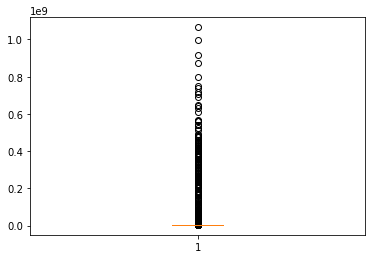

In [219]:
plt.boxplot(dollar.dollar_bar_value);

In [225]:
# 4th quartile
fourth_quartile = dollar.close[dollar['dollar_bar_value']>34000000].count()/len(dollar)
print(f'{round(fourth_quartile*100,3)}%')

0.223%


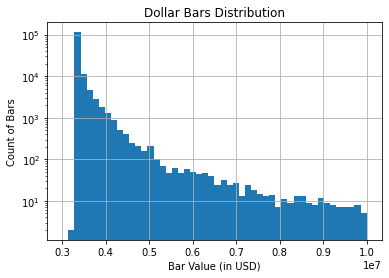

In [228]:
dollar.dollar_bar_value.hist(bins=50, range=(3000000,10000000), log=True);
plt.title('Dollar Bars Distribution')
plt.xlabel('Bar Value (in USD)')
plt.ylabel('Count of Bars')
plt.show()

# Question 3
Compute the serial auto-correlation (at lag=1) of returns. Which type of bars have the highest serial auto-correlation? The lowest? Which trading strategy do you expect will benefit from the highest? From the lowest? (2 pt)

## Answer
Highest autocorrelation for returns is tick but minutes have slightly higher log return autocorrelation. 
Lowest autocorrelation for returns is minutes but dollar has the lowest log return autocorrelation. 

A high positive autocorrelation would benefit a momentum following strategy where high negative autocorrelation would benefit a mean-reversion strategy.  

"a rising autocorrelation would be the perfect environment for a trend following strategy. But first we have to define the direction of the autocorrelation" https://www.quanttrader.com/index.php/using-autocorrelation-for-phase-detection/KahlerPhilipp2018

"Significant negative autocorrelation of returns indicates that price tends to systematically mean-revert in the period immediately subsequent to a move. We attribute this finding to a combination of factors. Among them, we believe the most important ones to be investor and trader overreaction, high volatility, and excessive use of leverage leading to liquidation cascades." http://tech.harbourfronts.com/trading-strategies-based-on-autocorrelation-properties-of-bitcoin/

In [235]:
return_autocorr, log_return_autocorr = [],[]
df_list = [minutes, dollar, volume, tick]
df_names_list = ['minutes', 'dollar', 'volume', 'tick']
for item in df_list:
    return_autocorr.append(item['return'].autocorr(lag=1))
    log_return_autocorr.append(item['log_return'].autocorr(lag=1))  

autocorr_df = pd.DataFrame(list(zip(df_names_list,return_autocorr,log_return_autocorr)), 
           columns=['bar_type','autocorr_return','autocorr_log_return'])
print('Sorted by return (top) and log return (bottom)')
display(autocorr_df.sort_values('autocorr_return'))
display(autocorr_df.sort_values('autocorr_log_return'))

Sorted by return (top) and log return (bottom)


,bar_type,autocorr_return,autocorr_log_return
0,minutes,-0.074530,-0.009494
1,dollar,-0.062187,-0.061943
2,volume,-0.052902,-0.052647
3,tick,-0.009760,-0.009607


,bar_type,autocorr_return,autocorr_log_return
1,dollar,-0.062187,-0.061943
2,volume,-0.052902,-0.052647
3,tick,-0.009760,-0.009607
0,minutes,-0.074530,-0.009494


# Question 4
Which type of return bars have the most normal (Gaussian) distribution of returns? Which type has the least? (2 pt)

## Answer:
The most normal return is volume and the least is by minute. The most normal log return is volume and the least is dollar.

In [ ]:
test_stat,test_pvalue,test_stat_log,test_pvalue_log = [],[],[],[]
df_list = [minutes, dollar, volume, tick]
df_names_list = ['minutes', 'dollar', 'volume', 'tick']
for item in df_list:
    jb_test = stats.jarque_bera(item['return'])
    jb_test_log = stats.jarque_bera(item['log_return'])
    
    test_stat.append(jb_test.statistic)
    test_pvalue.append(jb_test.pvalue)
    test_stat_log.append(jb_test_log.statistic)
    test_pvalue_log.append(jb_test_log.pvalue)

returns_df = pd.DataFrame(list(zip(df_names_list,test_stat,test_pvalue,test_stat_log,test_pvalue_log)), 
           columns=['bar_type','test_stat_return','test_pvalue','test_stat_log_return','test_pvalue_log'])

In [147]:
returns_df.sort_values('test_stat_return')

,bar_type,test_stat_return,test_pvalue,test_stat_log_return,test_pvalue_log
2,volume,2.753945e+09,0.0,3.172594e+09,0.0
3,tick,5.506980e+09,0.0,6.317639e+09,0.0
1,dollar,5.815168e+09,0.0,6.371091e+09,0.0
0,minutes,3.741606e+11,0.0,6.319238e+09,0.0


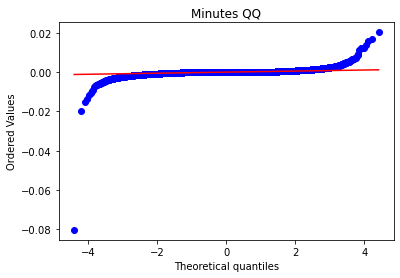

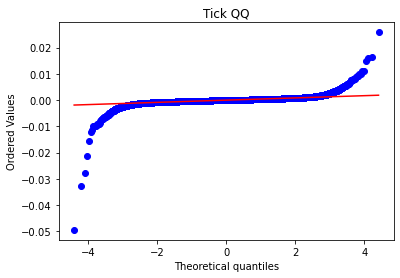

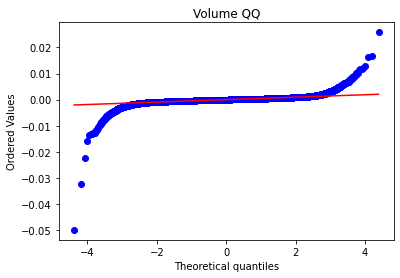

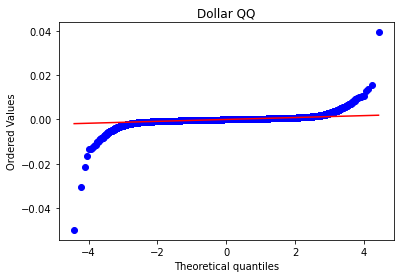

In [180]:
# QQ Plots per bar type
stats.probplot(minutes['return'], dist="norm", plot=plt)
plt.title('Minutes QQ')
plt.show()

stats.probplot(tick['return'], dist="norm", plot=plt)
plt.title('Tick QQ')
plt.show()

stats.probplot(volume['return'], dist="norm", plot=plt)
plt.title('Volume QQ')
plt.show()

stats.probplot(dollar['return'], dist="norm", plot=plt)
plt.title('Dollar QQ')
plt.show()

In [229]:
print('Return max:')
display(table[table['test_stat_return']==max(table['test_stat_return'])])
print('\n\nReturn min:')
display(table[table['test_stat_return']==min(table['test_stat_return'])])
print('\n\nLog-return max:')
display(table[table['test_stat_log_return']==max(table['test_stat_log_return'])])
print('\n\nLog-return min:')
display(table[table['test_stat_log_return']==min(table['test_stat_log_return'])])

Return max:


,bar_type,test_stat_return,test_pvalue,test_stat_log_return,test_pvalue_log
0,minutes,3.741606e+11,0.0,6.319238e+09,0.0




Return min:


,bar_type,test_stat_return,test_pvalue,test_stat_log_return,test_pvalue_log
2,volume,2.753945e+09,0.0,3.172594e+09,0.0




Log-return max:


,bar_type,test_stat_return,test_pvalue,test_stat_log_return,test_pvalue_log
1,dollar,5.815168e+09,0.0,6.371091e+09,0.0




Log-return min:


,bar_type,test_stat_return,test_pvalue,test_stat_log_return,test_pvalue_log
2,volume,2.753945e+09,0.0,3.172594e+09,0.0


# Question 5
Download the raw tick data for AAPL from AAPL_raw_tick_data.bz2  Download AAPL_raw_tick_data.bz2. Construct the “order flow” from this data. If you are curious, you can read more about order flow as it is found to be an important driver of future returns. See Chan, 2017, Machine Trading, Chapter 6. (2 pt)

In [16]:
def loosen(file):
 pikd = open(file, 'rb')
 data = pickle.load(pikd)
 pikd.close()
 return data
df = loosen('Downloads/data')

In [68]:
df = pd.read_pickle('AAPL_raw_tick_data.bz2')

In [73]:
# Unsigned - Labeled all trades before a lower price as sell 
df['buy_sell'] = np.nan
df['buy_sell'].loc[df.price.shift(-1) < df.price] = 'Sell'
df['buy_sell'].loc[df.price.shift(-1) > df.price] = 'Buy'
df['buy_sell'].bfill(inplace=True)
df.head(15)

/home/doemerson123/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/home/doemerson123/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,date_time,price,volume,buy_sell
0,2019-01-02 04:00:00,154.40,260,Sell
1,2019-01-02 04:00:00,154.40,242,Sell
2,2019-01-02 04:00:00,154.40,218,Sell
3,2019-01-02 04:00:00,154.40,100,Sell
4,2019-01-02 04:00:00,154.40,200,Sell
5,2019-01-02 04:00:04,154.00,100,Sell
6,2019-01-02 04:00:12,153.01,100,Buy
7,2019-01-02 04:00:12,153.01,200,Buy
8,2019-01-02 04:00:12,153.01,100,Buy
9,2019-01-02 04:00:30,153.88,100,Buy


In [103]:
# "Consolidated" order flow with magnitude of action by timestep
#  https://youtu.be/wfjvphj1-LU?t=551
testing = df[:200]
condensed_order_flow = pd.concat([testing.groupby('date_time')['volume'].sum(),
           testing.groupby('date_time')['price'].unique(), 
           testing.groupby('date_time')['buy_sell'].sum()],
          axis=1)
condensed_order_flow[:20]

,volume,price,buy_sell
date_time,,,
2019-01-02 04:00:00,1020,[154.4],SellSellSellSellSell
2019-01-02 04:00:04,100,[154.0],Sell
2019-01-02 04:00:12,400,[153.01],BuyBuyBuy
2019-01-02 04:00:30,100,[153.88],Buy
2019-01-02 04:00:32,400,[153.9],Buy
2019-01-02 04:00:56,500,[154.0],BuyBuy
2019-01-02 04:01:50,100,[154.0],Buy
2019-01-02 04:03:26,200,"[154.01, 154.0]",SellBuy
2019-01-02 04:04:18,437,[154.0],Buy


In [244]:
# Order flow with signed volume
signed_vol = df[:200]
signed_vol['volume'][signed_vol['buy_sell']=='Sell'] *=-1
signed_vol[:8]

<ipython-input-244-87bfb6eda072>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  signed_vol['volume'][signed_vol['buy_sell']=='Sell'] *=-1
/home/doemerson123/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


,date_time,price,volume,buy_sell
0,2019-01-02 04:00:00,154.40,-260,Sell
1,2019-01-02 04:00:00,154.40,-242,Sell
2,2019-01-02 04:00:00,154.40,-218,Sell
3,2019-01-02 04:00:00,154.40,-100,Sell
4,2019-01-02 04:00:00,154.40,-200,Sell
5,2019-01-02 04:00:04,154.00,-100,Sell
6,2019-01-02 04:00:12,153.01,100,Buy
7,2019-01-02 04:00:12,153.01,200,Buy


In [250]:
# Net orderflow by time
pd.DataFrame(signed_vol.groupby(['date_time','price'])['volume'].sum())

volume
date_time           price         
2019-01-02 04:00:00 154.40   -1020
2019-01-02 04:00:04 154.00    -100
2019-01-02 04:00:12 153.01     400
2019-01-02 04:00:30 153.88     100
2019-01-02 04:00:32 153.90     400
2019-01-02 04:00:56 154.00     500
2019-01-02 04:01:50 154.00     100
2019-01-02 04:03:26 154.00     100
                    154.01    -100
2019-01-02 04:04:18 154.00     437
2019-01-02 04:05:25 154.33    -187
2019-01-02 04:05:59 154.00   -1000
2019-01-02 04:06:02 154.00    -100
2019-01-02 04:06:04 154.00    -100
2019-01-02 04:06:15 154.00    -200
2019-01-02 04:06:17 154.00    -100
2019-01-02 04:06:18 154.00    -100
2019-01-02 04:06:27 153.80     410
2019-01-02 04:07:43 153.99     500
2019-01-02 04:08:33 153.99     100
2019-01-02 04:08:34 154.00     200
2019-01-02 04:08:37 154.00     500
2019-01-02 04:12:37 154.15     100
2019-01-02 04:15:48 154.33     500
2019-01-02 04:16:25 154.35     287
2019-01-02 04:16:26 154.40    -100
2019-01-02 04:16:45 154.30    -100
2019-01-02 04:16:46 154.29     100
2019-01-02 04:16:50 154.29     100
2019-01-02 04:16:51 154.29     900
2019-01-02 04:16:52 154.29     880
2019-01-02 04:17:19 154.20     490
                    154.40    -200
2019-01-02 04:23:46 154.50     722
2019-01-02 04:24:45 154.50    1000
2019-01-02 04:28:15 154.58     200
2019-01-02 04:29:25 154.68    -100
2019-01-02 04:31:40 154.50    -100
2019-01-02 04:36:34 154.50    -500
2019-01-02 04:40:09 154.40    -100
2019-01-02 04:40:10 154.40    -200
2019-01-02 04:40:11 154.40    -408
2019-01-02 04:41:36 154.35     100
                    154.39     980
                    154.60     600
                    154.62     100
                    154.65    -647
2019-01-02 04:53:38 154.30    -500
2019-01-02 04:53:49 154.25    -300
2019-01-02 04:54:25 154.06     644
                    154.08    -200
                    154.11    -600
2019-01-02 04:54:26 154.06    1100
2019-01-02 04:54:27 154.06     700
                    154.65     200
                    154.70    -200
2019-01-02 05:00:39 154.50     300
2019-01-02 05:02:28 154.50     284
                    154.62     400
                    154.64     100
                    154.69    -216
2019-01-02 05:06:43 154.60     100
2019-01-02 05:14:39 154.67    -100
2019-01-02 05:15:47 154.60     100
2019-01-02 05:22:47 154.70    -100
2019-01-02 05:23:40 154.70    -150
2019-01-02 05:25:13 154.50     692
                    154.54    -108
2019-01-02 05:25:28 154.50     308
2019-01-02 05:25:30 154.50     100
2019-01-02 05:33:14 154.59    -900
2019-01-02 05:33:37 154.59   -1577
2019-01-02 05:35:15 154.59    -196
2019-01-02 05:35:16 154.50    -100
2019-01-02 05:35:17 154.50    -200
2019-01-02 05:36:10 154.46    -300
2019-01-02 05:36:11 154.45    -102
2019-01-02 05:38:23 154.35     446
2019-01-02 05:54:33 154.44     121
2019-01-02 05:56:21 154.50    -100
2019-01-02 05:58:14 154.46     141
2019-01-02 06:00:12 154.58    -350
2019-01-02 06:01:57 154.35    -204
2019-01-02 06:02:02 154.35    -150
2019-01-02 06:02:22 154.35    -212
2019-01-02 06:02:47 154.35    -212
2019-01-02 06:02:56 154.35    -212
2019-01-02 06:03:28 154.31    -100
2019-01-02 06:04:51 154.31    -100
2019-01-02 06:04:58 154.30     212
2019-01-02 06:05:03 154.30     212
2019-01-02 06:05:13 154.30     212
2019-01-02 06:05:27 154.31    -100
2019-01-02 06:05:33 154.31    -212
2019-01-02 06:05:38 154.30    -100
2019-01-02 06:05:49 154.30    -212
2019-01-02 06:05:54 154.17     100
2019-01-02 06:06:10 154.17     208
2019-01-02 06:06:16 154.17     100
2019-01-02 06:06:17 154.45    -100
2019-01-02 06:06:27 154.15     212
2019-01-02 06:06:29 154.15     212
2019-01-02 06:07:55 154.16     100
2019-01-02 06:10:20 154.35     100
2019-01-02 06:10:21 154.35     300
2019-01-02 06:11:42 154.35     100
2019-01-02 06:15:50 154.48     121
2019-01-02 06:22:25 154.54     232
2019-01-02 06:25:41 154.54     200
2019-01-02 06:33:20 154.65    -200
2019-01-02 06:35:51 154.50     100
2019-01-02 06:38:57 154.60    -100
2019-01-02 06:39:00 154.60    -400
201

In [266]:
from scipy import stats
lookback=100
orderflow = pd.DataFrame()
for t in range(lookback+1,200):
    deltaPrice = volume.iloc[t, 3] - volume.iloc[t-1, 3]
    myDeltaPrice = volume.iloc[t-lookback:t-1,3].diff()
    myDeltaPrice = myDeltaPrice.replace({np.nan: None})
    orderflow.iloc[t, 0] = stats.norm.cdf(deltaPrice, loc = 0, scale = myDeltaPrice.std())
    orderflow.iloc[t, 1] = 1- orderflow.iloc[t, 0]


IndexError: iloc cannot enlarge its target object

In [259]:
orderflow

NameError: name 'orderflow' is not defined